# Exercise 4b - Image Morphology

In [4]:
import numpy as np
import skimage.io as io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
import matplotlib.pyplot as plt

In [8]:
#funcion pa mostrar imagen y la filtrada

# From https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

In [9]:
in_dir = 'data/'

## Image morphology on a single object

Morphological operations are applied to the region with "True" (for boolean images). In other words, morphological operations are applied to the white areas in the binary image.

La morfología de imágenes es un conjunto de operaciones para procesar imágenes binarias (formadas por píxeles de 0 y 1), basándose en la forma o estructura de los objetos en la imagen.

### Exercise 1

0.7103125574448529


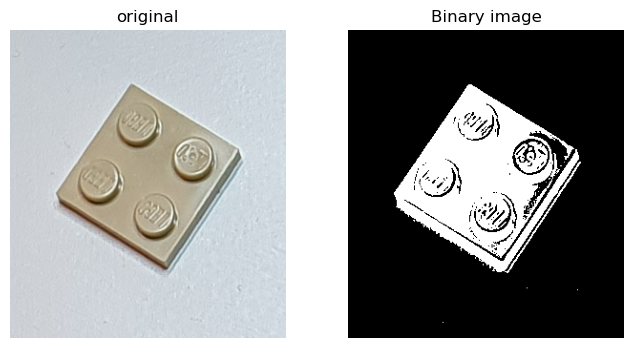

In [23]:
in_file = 'lego_5.png'
# original
im_org = io.imread(f'{in_dir}{in_file}')
# filtrada con otsu
im_gray = rgb2gray(im_org)
thres = threshold_otsu(im_gray)
bin_img = im_gray < thres # The ROI is usually with 
#print(bin_img.dtype)
print(thres)
plot_comparison(im_org, bin_img, 'Binary image')

As ncan be seen, the lego brick is not segmented perfectly. There are holes in the segmentation. Let us see if what we can do.

### Exercise 2


We will start by creating a structuring element. In scikit-image they are called footprint. A disk shaped footprint can be created by:

In [22]:
footprint = disk(2) # 3sto es el radio(2+ el centro)
# Check the size and shape of the structuring element
print(footprint)

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


The morphological operation erosion can remove small objects, separate objects and make objects smaller. Try it on the binary lego image:

In [21]:
def apply_erosion(binary, disk_sz):
    # le pasas la img y el size del disco
    footprint = disk(disk_sz)
    eroded = erosion(binary, footprint)
    return eroded

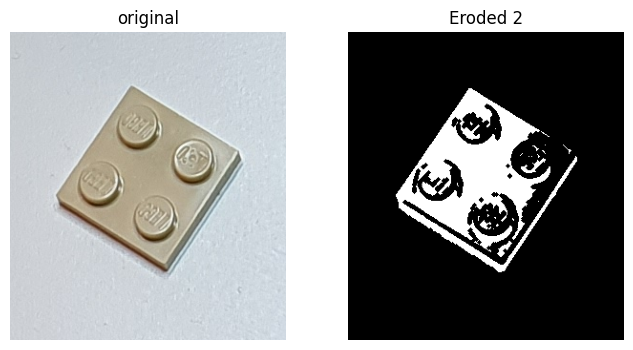

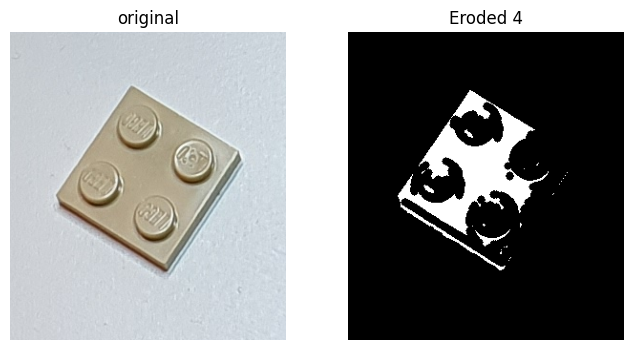

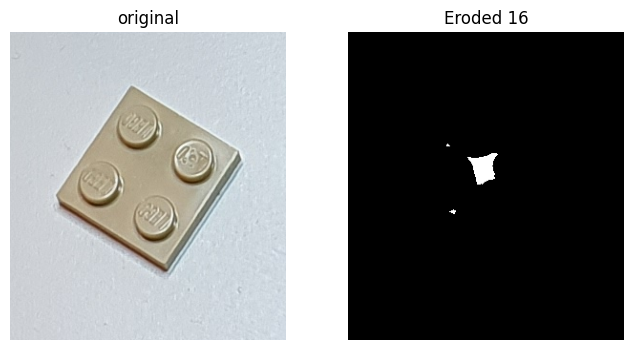

In [7]:
for sz in [2, 4, 16]:
    eroded = apply_erosion(bin_img, sz)
    plot_comparison(im_org, eroded, f'Eroded {sz}')

Experiement with different sizes of the footprint and observe the results.:

cuanto más grande es el disco más erosiona

### Exercise 3
The morphological operation dilation makes objects larger, closes holes and connects objects. Try it on the binary lego image:

In [20]:
def apply_dilation(binary, disk_sz):
    footprint = disk(disk_sz)
    dilated = dilation(binary, footprint)
    return dilated

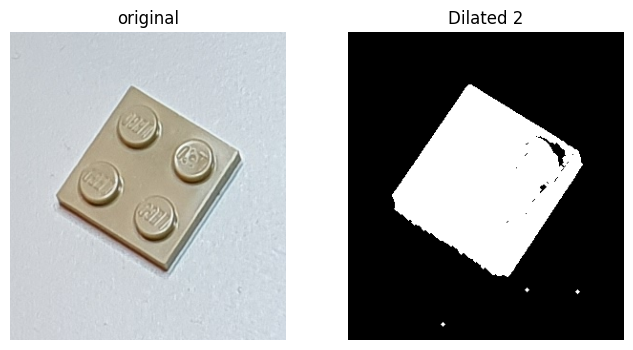

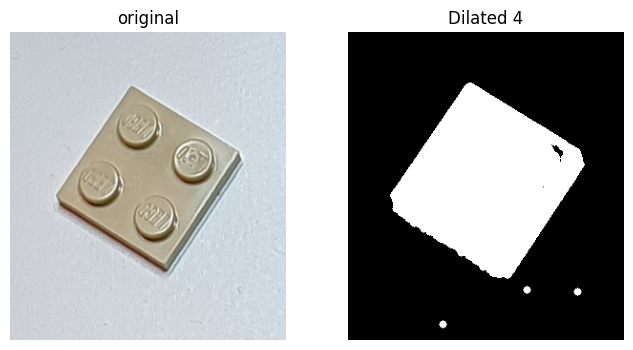

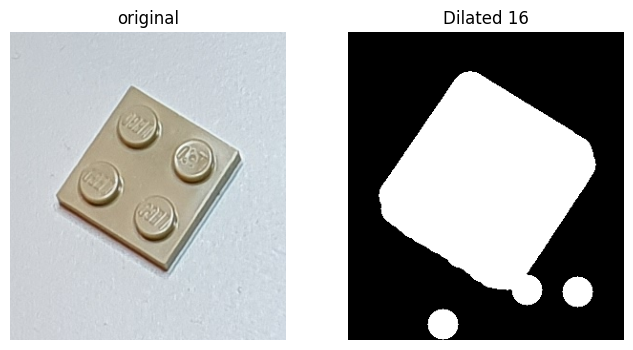

In [9]:
for sz in [2, 4, 16]:
    dilated = apply_dilation(bin_img, sz)
    plot_comparison(im_org, dilated, f'Dilated {sz}')

Cuanto mayor es el disco más amplia

### Exercise 4
The morphological operation opening removes small objects without changing the size of the remaining objects. Try it on the binary lego image: dentro de los objetos


In [18]:
def apply_opening(binary, disk_sz):
    footprint = disk(disk_sz)
    opened = opening(binary, footprint)
    
    return opened

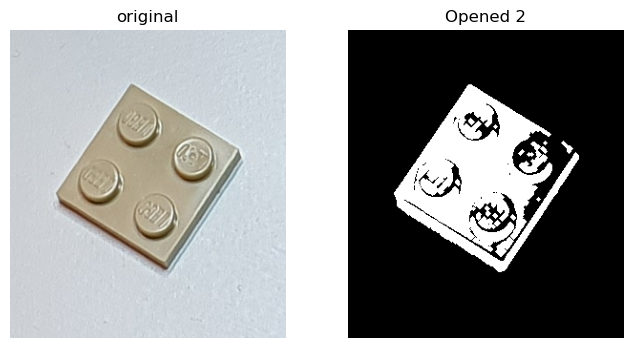

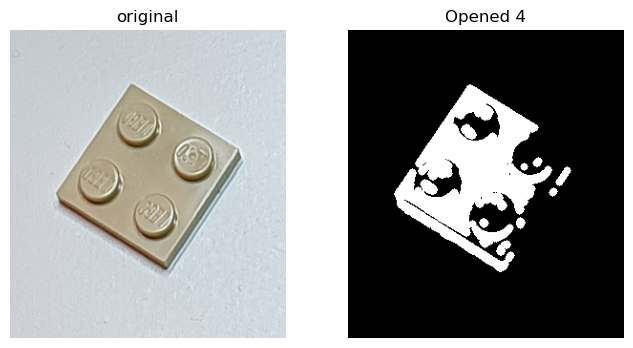

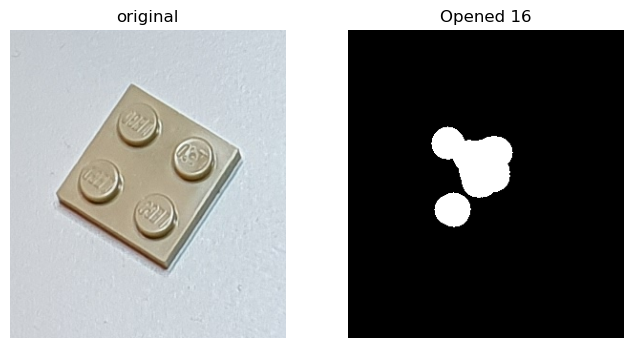

In [19]:
for sz in [2, 4, 16]:
    opened = apply_opening(bin_img, sz)
    
    plot_comparison(im_org, opened, f'Opened {sz}')

A medida que aumenta el tamaño del disco, la operación de apertura elimina más detalles pequeños y afecta más los objetos en la imagen binaria.

### Exercise 5
The morphological operation closing closes holes in objects without changing the size of the remaining objects. Try it on the binary lego image: dentro de los objetos

In [24]:
def apply_closing(binary, disk_sz):
    footprint = disk(disk_sz)
    closed = closing(binary, footprint)
    return closed

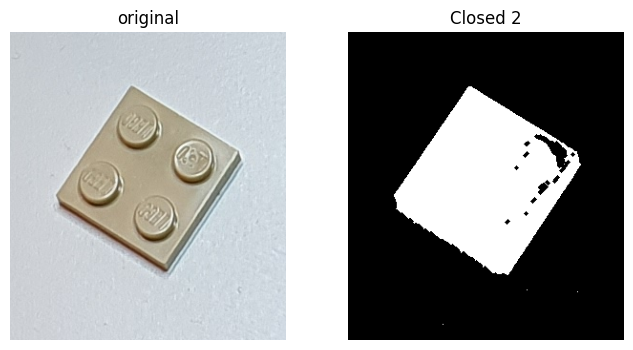

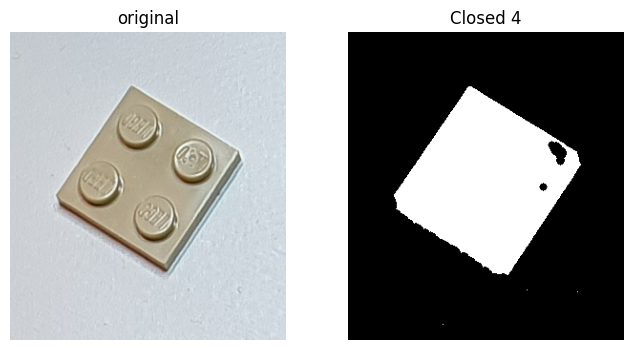

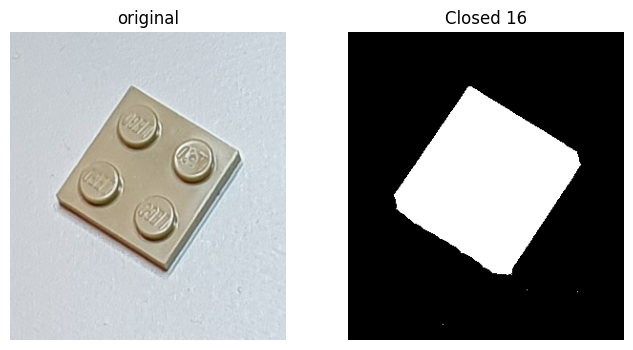

In [13]:
for sz in [2, 4, 16]:
    closed = apply_closing(bin_img, sz)
    plot_comparison(im_org, closed, f'Closed {sz}')

- Disco pequeño (sz=2):

Cierra pequeños huecos dentro de los objetos o entre píxeles conectados cercanos.
- Disco grande (sz=16):

Cierra grandes huecos y conecta objetos separados más distantes.

## Object outline (esquema del objeto, para sacarle el borde)
It can be useful to compute the outline of an object both to measure the perimeter but also to see if it contains holes or other types of noise. Start by defining an outline function:

In [57]:
# SACA EL BORDE DEL OBJETO ESTA FUNCION
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """

    footprint = disk(1)
    #a dilatación expande las áreas blancas (1s) utilizando el disco como
    dilated = dilation(bin_img, footprint) 
    #Calcula la diferencia simétrica (XOR lógico) entre la imagen dilatada y la original. Esto resalta solo los píxeles
    #  que están en la imagen dilatada pero no en la original, es decir, el contorno (borde) de los objetos.
    outline = np.logical_xor(dilated, bin_img)
    return outline

### Exercise 6


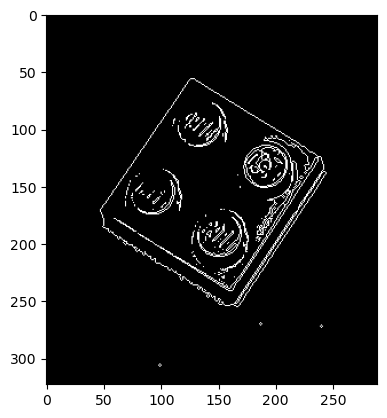

In [16]:
outline_img = compute_outline(bin_img)
plt.imshow(outline_img, cmap = 'gray') # Some people had problems with io.imshow() in boolean images
plt.show()

### Exercise 7
Do an opening with a disk of size 1 on the binary lego image.
Do a closing with a disk of size 15 on the result of the opening.
Compute the outline and visualize it.


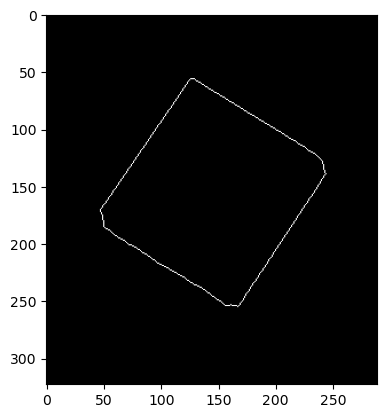

In [31]:
step1 = apply_opening(bin_img, 1) # apertura de  1
'''#print(step1)
plt.imshow(step1, cmap = 'gray')
plt.show()'''
step2 = apply_closing(step1, 15) # ciere

outline_img = compute_outline(step2) # dilata
plt.imshow(outline_img, cmap = 'gray')
plt.show()

## Morphology on multiple objects


### Exercise 8
Compute a treshold using Otsu's method and apply it to the image.
Show the binary image together with the original.
Compute the outline of the binary image and show it with the binary image.


0.5710768405330883


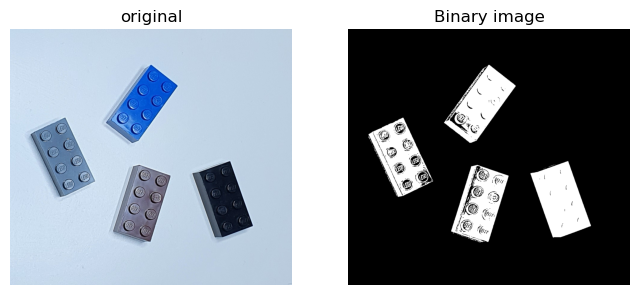

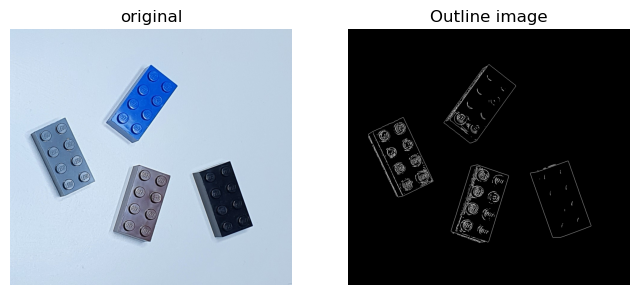

In [ ]:
in_file = 'lego_7.png'
im_org = io.imread(f'{in_dir}{in_file}')
im_gray = rgb2gray(im_org)
# otsu
thres = threshold_otsu(im_gray)
print(thres) # será del 0 al 1 que esta en gray.
bin_img = im_gray < thres

# BUENA FORMA DE PLOTEAR CHULA
plot_comparison(im_org, bin_img, 'Binary image')

outline_img = compute_outline(bin_img)
plot_comparison(im_org, outline_img, 'Outline image')

### Exercise 9
We would like to find a way so only the outline of the entire brick is computed. So for each lego brick there should only be one closed curve.

Try using the closing operations and find out which size of footprint that gives the desired result?

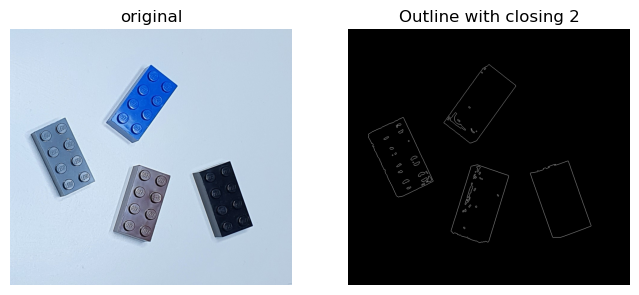

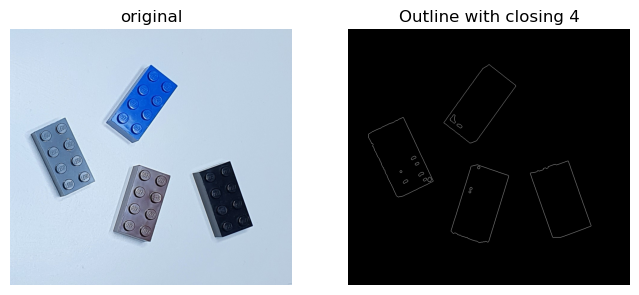

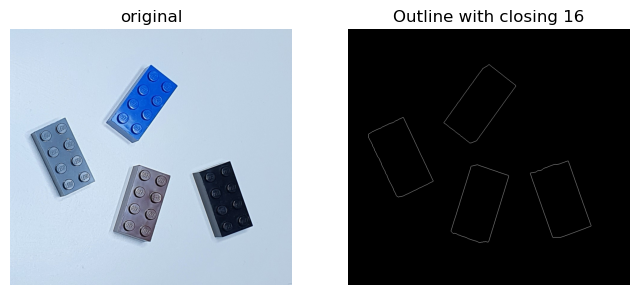

In [34]:
for sz in [2, 4, 16]:
    closed = apply_closing(bin_img, sz)
    outline_img = compute_outline(closed)
    plot_comparison(im_org, outline_img, f'Outline with closing {sz}')

Un footprint pequeño no elimina los detalles internos de las piezas.
Un footprint demasiado grande puede fusionar piezas separadas en un solo bloque.
El tamaño adecuado elimina detalles internos y mantiene cada pieza como un objeto independiente con un único contorno cerrado.

Diferencia clave:
- Opening: Quita cosas pequeñas (ruido).
- Closing: Une cosas pequeñas (rellena huecos).

Ambas dependen del tamaño del elemento estructurante. 😊

### Exercise 10
Try the above on the lego_3.png image. What do you observe?




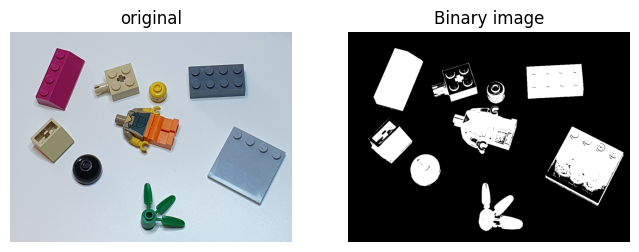

In [19]:
in_file = 'lego_3.png'
im_org = io.imread(f'{in_dir}{in_file}')
im_gray = rgb2gray(im_org)

thres = threshold_otsu(im_gray)
bin_img = im_gray < thres
plot_comparison(im_org, bin_img, 'Binary image')

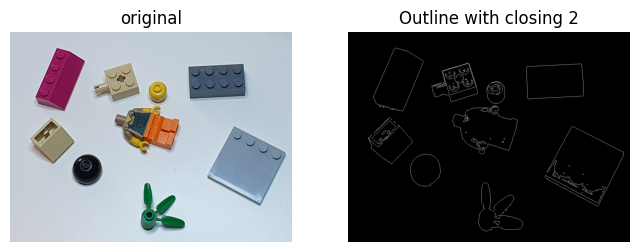

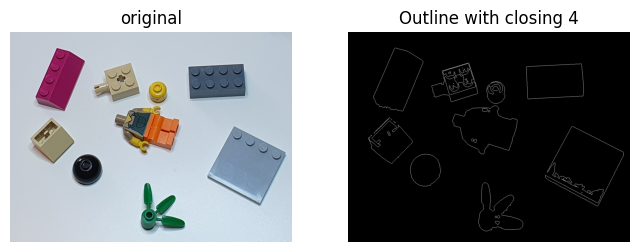

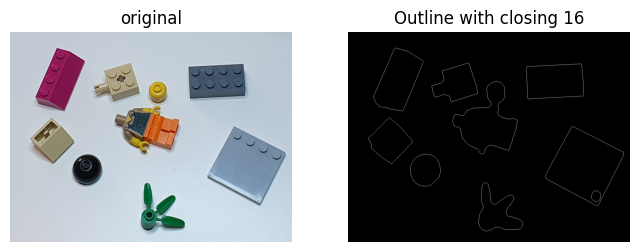

In [20]:
for sz in [2, 4, 16]:
    closed = apply_closing(bin_img, sz)
    outline_img = compute_outline(closed)
    plot_comparison(im_org, outline_img, f'Outline with closing {sz}')

## Morphology on multiple connected objects
Morphology is a strong tool that can be used to clean images and separate connected objects. In image lego_9.png some lego bricks are touching. We would like to see if we can separate them.

### Exercise 11
Compute a treshold using Otsu's method and apply it to the image.


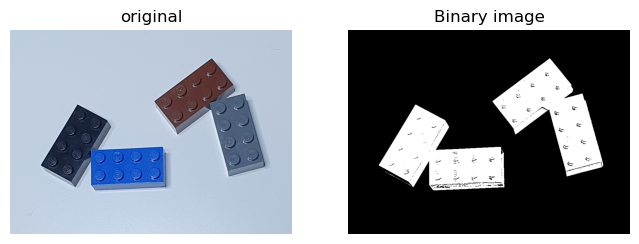

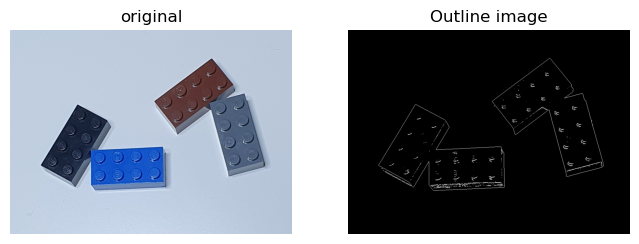

In [38]:
in_file = 'lego_9.png'
im_org = io.imread(f'{in_dir}{in_file}')
im_gray = rgb2gray(im_org)

thres = threshold_otsu(im_gray)
bin_img = im_gray < thres
plot_comparison(im_org, bin_img, 'Binary image')

outline_img = compute_outline(bin_img)
plot_comparison(im_org, outline_img, 'Outline image')

### Exercise 12
Let us start by trying to remove the noise holes inside the lego bricks. Do that with an closing and find a good footprint size. Compute the outline and see what you observe?

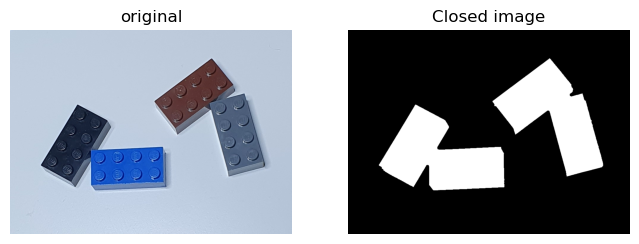

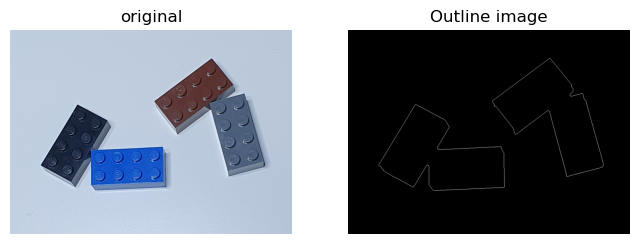

In [40]:
closed = apply_closing(bin_img, 5)
plot_comparison(im_org, closed, 'Closed image')
outline_img = compute_outline(closed)
plot_comparison(im_org, outline_img, 'Outline image')

### Exercise 13
lo mismo de arriba + erosion


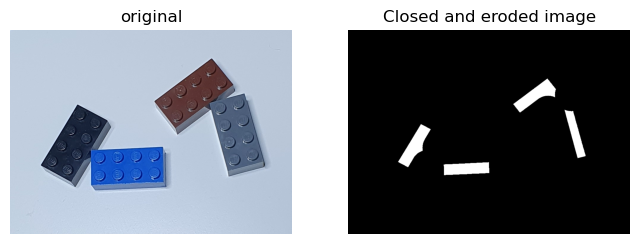

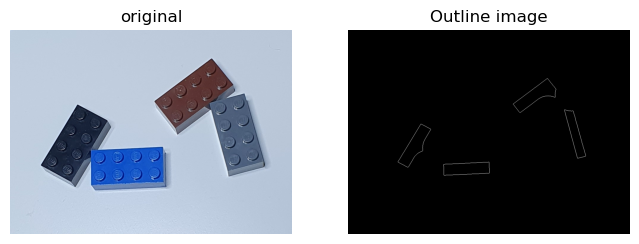

In [44]:
closed = apply_closing(bin_img, 5)
eroded = apply_erosion(closed, 50)
plot_comparison(im_org, eroded, 'Closed and eroded image')
outline_img = compute_outline(eroded)
plot_comparison(im_org, outline_img, 'Outline image')

### Exercise 14

The objects lost a lot of size in the previous step. Try to use dilate to make them larger. 

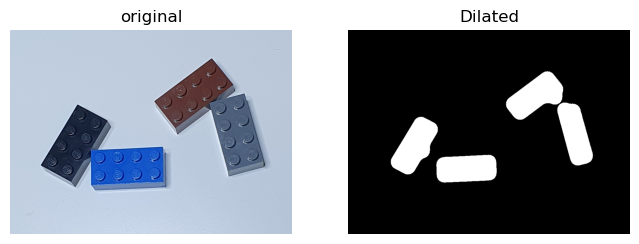

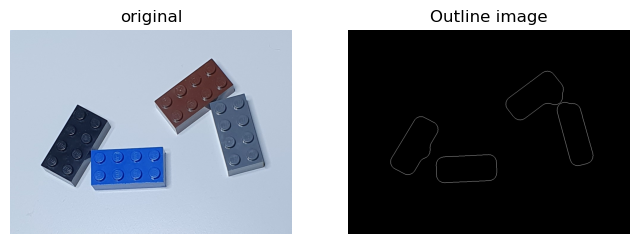

In [52]:
# primero dilata la que ha erosionado previamente 
dilated = apply_dilation(eroded, 25)
plot_comparison(im_org, dilated, 'Dilated')

# luego deteccion de bordes
outline_img = compute_outline(dilated)
plot_comparison(im_org, outline_img, 'Outline image')

## Puzzle piece analysis
We would like to make a program that can help solving puzzles. The first task is to outline each piece

### Exercise 15
Use the previosly used methods to compute a binary image from the puzzle photo. What do you observe?

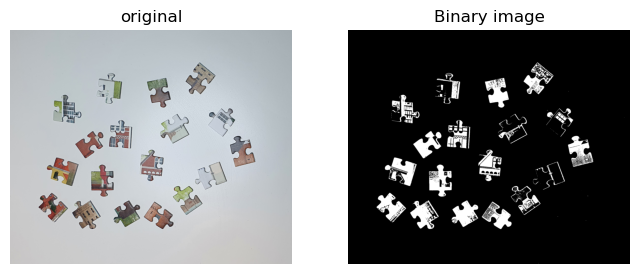

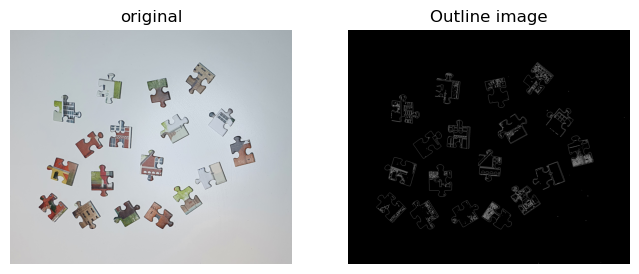

In [56]:
in_file = 'puzzle_pieces.png'
im_org = io.imread(f'{in_dir}{in_file}')
im_gray = rgb2gray(im_org)
# otsu 
thres = threshold_otsu(im_gray)
bin_img = im_gray < thres
plot_comparison(im_org, bin_img, 'Binary image')
# luego comute para los outlines
outline_img = compute_outline(bin_img)
plot_comparison(im_org, outline_img, 'Outline image')

### Exercise 16

Try to use a an opening with a large footprint to clean the binary. Compute the outline. 

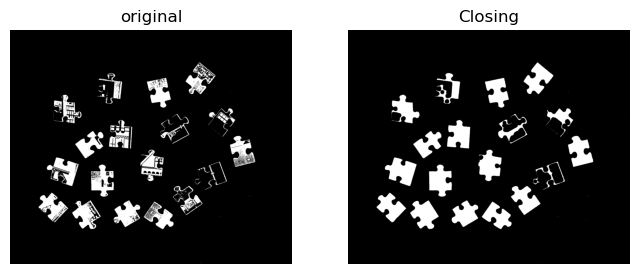

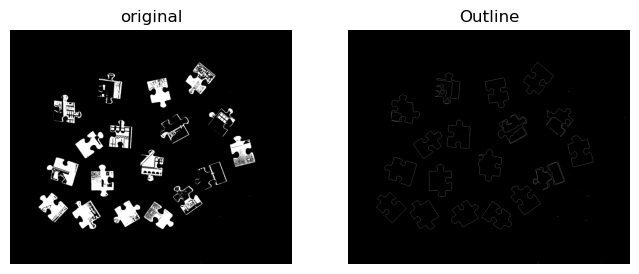

In [58]:
closed = apply_closing(bin_img, 15)
plot_comparison(bin_img, closed, 'Closing')

outline = compute_outline(closed)
plot_comparison(bin_img, outline, 'Outline')

The conclusion is that you can solve a lot of problems using morphological operations but sometimes it is better to think even more about how to acquire the images